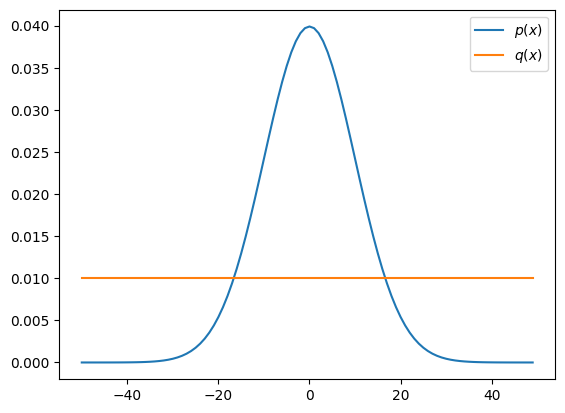

In [3]:
from scipy.stats import norm, uniform
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
mu = 0
sd = 10
def p(x):
    return norm.pdf(x, loc=mu, scale=sd)

def q(x):
    pdf = []
    for i in range(len(x)):
        pdf.append(1/len(x))
    return np.array(pdf)

x = np.arange(-50, 50)
fig, ax = plt.subplots()
ax.plot(x, p(x), label=r"$p(x)$")
ax.plot(x, q(x), label=r"$q(x)$")
plt.legend()
plt.savefig("./../../notes/img/rejection_1")

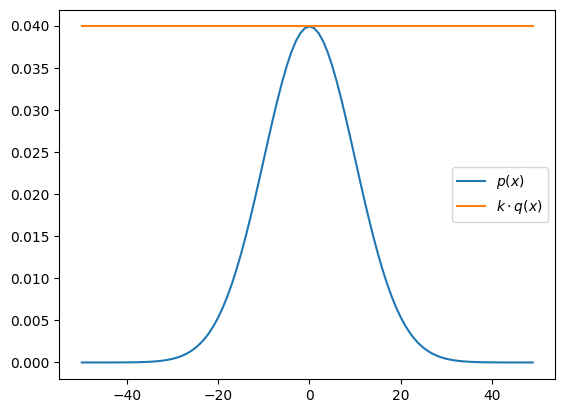

In [4]:
k = max(p(x) / q(x))
fig, ax = plt.subplots()
ax.plot(x, p(x), label=r"$p(x)$")
ax.plot(x, k * q(x), label=r"$k \cdot q(x)$")
plt.legend()
plt.savefig("./../../notes/img/rejection_2.png")

In [7]:
def sample(size):
    xs = np.random.normal(mu, sd, size=size)
    cs = np.random.uniform(0, 1, size=size)
    mask = p(xs) / (k * q(xs)) > cs
    return xs[mask]  

/var/folders/p_/9wsmk1hj66q4j08whtyzyk2m0000gn/T/ipykernel_68729/1757794360.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(samples)


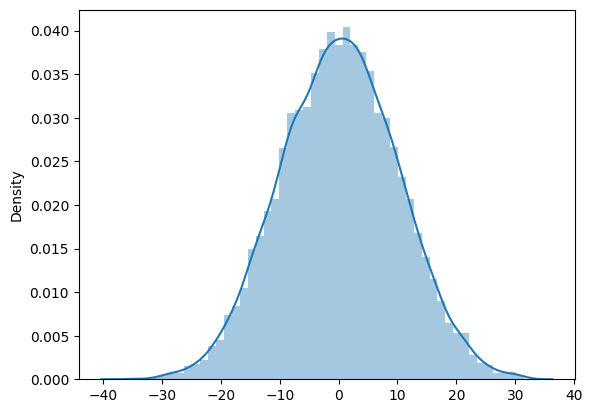

In [8]:
samples = sample(10000)
sns.distplot(samples)
plt.savefig("./../../notes/img/rejection_3.png")